In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read all the data sets

set2_human = pd.read_json('dataset/set2_human.json')
set2_machine = pd.read_json('dataset/set2_machine.json')
set_test = pd.read_json('dataset/test.json')

# Add in label for all data sets
set2_human = set2_human.assign(label=1)
set2_machine = set2_machine.assign(label=0)

In [3]:
pd.concat([set2_human, set2_machine])['txt'].str.len().describe()

count     500.000000
mean      574.574000
std       344.272933
min        50.000000
25%       278.250000
50%       485.500000
75%       803.000000
max      1496.000000
Name: txt, dtype: float64

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

def preprocess(x_set):
    x_set['txt'] = x_set['txt'].apply(lambda x: ' '.join(map(str, x)))
    vectorizer = CountVectorizer()
    vectorized_words = vectorizer.fit_transform(x_set['txt'])
    x_set_vectorized = pd.DataFrame(vectorized_words.toarray())
    return x_set_vectorized

In [5]:
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb

def predict(classifier, x_set_train, y_set_train, x_set_test, y_set_test):
    classifier.fit(x_set_train, y_set_train)

    y_pred = classifier.predict(x_set_test)
    
    print(classification_report(y_pred, y_set_test))
    #cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_set_test, y_pred))
    #cm_display.plot();
    
    return f1_score(y_pred, y_set_test, average='macro')

In [6]:
def test_5_times(set2_human, set2_machine, classifier):
    F1_score = []
    for i in range(0, 5):
        set2 = pd.concat([set2_human, set2_machine.sample(100)])
        x_set2 = pd.DataFrame(set2[['txt', 'prompt']])
        y_set2 = pd.DataFrame(set2[['label']])
        new_x_set2 = preprocess(x_set2)
        x_set2_train, x_set2_test, y_set2_train, y_set2_test= train_test_split(new_x_set2, y_set2, test_size=0.2, stratify=y_set2)
        F1_score.append(predict(classifier, x_set2_train,  y_set2_train, x_set2_test, y_set2_test))
    
    return sum(F1_score) / len(F1_score)

In [7]:
test_5_times(set2_human, set2_machine, SVC())

/home/jiaming/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jiaming/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.60      0.52      0.56        23
           1       0.45      0.53      0.49        17

    accuracy                           0.53        40
   macro avg       0.53      0.53      0.52        40
weighted avg       0.54      0.53      0.53        40

              precision    recall  f1-score   support

           0       0.55      0.55      0.55        20
           1       0.55      0.55      0.55        20

    accuracy                           0.55        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.55      0.55      0.55        40



/home/jiaming/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jiaming/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.85      0.74      0.79        23
           1       0.70      0.82      0.76        17

    accuracy                           0.78        40
   macro avg       0.77      0.78      0.77        40
weighted avg       0.79      0.78      0.78        40

              precision    recall  f1-score   support

           0       0.35      0.64      0.45        11
           1       0.80      0.55      0.65        29

    accuracy                           0.57        40
   macro avg       0.57      0.59      0.55        40
weighted avg       0.68      0.57      0.60        40

              precision    recall  f1-score   support

           0       0.55      0.69      0.61        16
           1       0.75      0.62      0.68        24

    accuracy                           0.65        40
   macro avg       0.65      0.66      0.65        40
weighted avg       0.67      0.65      0.65        40



/home/jiaming/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6089683873190463

In [8]:
test_5_times(set2_human, set2_machine, LogisticRegression())

/home/jiaming/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jiaming/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.60      0.60      0.60        20
           1       0.60      0.60      0.60        20

    accuracy                           0.60        40
   macro avg       0.60      0.60      0.60        40
weighted avg       0.60      0.60      0.60        40



/home/jiaming/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jiaming/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.70      0.58      0.64        24
           1       0.50      0.62      0.56        16

    accuracy                           0.60        40
   macro avg       0.60      0.60      0.60        40
weighted avg       0.62      0.60      0.60        40



/home/jiaming/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jiaming/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.70      0.61      0.65        23
           1       0.55      0.65      0.59        17

    accuracy                           0.62        40
   macro avg       0.62      0.63      0.62        40
weighted avg       0.64      0.62      0.63        40



/home/jiaming/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jiaming/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.70      0.61      0.65        23
           1       0.55      0.65      0.59        17

    accuracy                           0.62        40
   macro avg       0.62      0.63      0.62        40
weighted avg       0.64      0.62      0.63        40

              precision    recall  f1-score   support

           0       0.65      0.57      0.60        23
           1       0.50      0.59      0.54        17

    accuracy                           0.57        40
   macro avg       0.57      0.58      0.57        40
weighted avg       0.59      0.57      0.58        40



/home/jiaming/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6028625665834968

In [9]:
test_5_times(set2_human, set2_machine, RandomForestClassifier())

/tmp/ipykernel_106/156337231.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_set_train, y_set_train)


              precision    recall  f1-score   support

           0       0.60      0.67      0.63        18
           1       0.70      0.64      0.67        22

    accuracy                           0.65        40
   macro avg       0.65      0.65      0.65        40
weighted avg       0.65      0.65      0.65        40



/tmp/ipykernel_106/156337231.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_set_train, y_set_train)


              precision    recall  f1-score   support

           0       0.60      0.63      0.62        19
           1       0.65      0.62      0.63        21

    accuracy                           0.62        40
   macro avg       0.62      0.63      0.62        40
weighted avg       0.63      0.62      0.63        40



/tmp/ipykernel_106/156337231.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_set_train, y_set_train)


              precision    recall  f1-score   support

           0       0.55      0.69      0.61        16
           1       0.75      0.62      0.68        24

    accuracy                           0.65        40
   macro avg       0.65      0.66      0.65        40
weighted avg       0.67      0.65      0.65        40



/tmp/ipykernel_106/156337231.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_set_train, y_set_train)


              precision    recall  f1-score   support

           0       0.55      0.58      0.56        19
           1       0.60      0.57      0.59        21

    accuracy                           0.57        40
   macro avg       0.57      0.58      0.57        40
weighted avg       0.58      0.57      0.58        40

              precision    recall  f1-score   support

           0       0.45      0.56      0.50        16
           1       0.65      0.54      0.59        24

    accuracy                           0.55        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.57      0.55      0.55        40



/tmp/ipykernel_106/156337231.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_set_train, y_set_train)


0.6081083372482602

In [10]:
test_5_times(set2_human, set2_machine,AdaBoostClassifier())

/home/jiaming/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.80      0.62      0.70        26
           1       0.50      0.71      0.59        14

    accuracy                           0.65        40
   macro avg       0.65      0.66      0.64        40
weighted avg       0.70      0.65      0.66        40



/home/jiaming/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.60      0.63      0.62        19
           1       0.65      0.62      0.63        21

    accuracy                           0.62        40
   macro avg       0.62      0.63      0.62        40
weighted avg       0.63      0.62      0.63        40



/home/jiaming/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.70      0.58      0.64        24
           1       0.50      0.62      0.56        16

    accuracy                           0.60        40
   macro avg       0.60      0.60      0.60        40
weighted avg       0.62      0.60      0.60        40



/home/jiaming/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.55      0.52      0.54        21
           1       0.50      0.53      0.51        19

    accuracy                           0.53        40
   macro avg       0.53      0.53      0.52        40
weighted avg       0.53      0.53      0.53        40



/home/jiaming/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.75      0.62      0.68        24
           1       0.55      0.69      0.61        16

    accuracy                           0.65        40
   macro avg       0.65      0.66      0.65        40
weighted avg       0.67      0.65      0.65        40



0.6067672788401376

In [11]:
test_5_times(set2_human, set2_machine, GaussianNB())

              precision    recall  f1-score   support

           0       0.35      0.58      0.44        12
           1       0.75      0.54      0.63        28

    accuracy                           0.55        40
   macro avg       0.55      0.56      0.53        40
weighted avg       0.63      0.55      0.57        40



/home/jiaming/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jiaming/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.35      0.70      0.47        10
           1       0.85      0.57      0.68        30

    accuracy                           0.60        40
   macro avg       0.60      0.63      0.57        40
weighted avg       0.72      0.60      0.63        40

              precision    recall  f1-score   support

           0       0.25      0.45      0.32        11
           1       0.70      0.48      0.57        29

    accuracy                           0.48        40
   macro avg       0.47      0.47      0.45        40
weighted avg       0.58      0.47      0.50        40



/home/jiaming/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jiaming/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.30      0.55      0.39        11
           1       0.75      0.52      0.61        29

    accuracy                           0.53        40
   macro avg       0.53      0.53      0.50        40
weighted avg       0.63      0.53      0.55        40

              precision    recall  f1-score   support

           0       0.40      0.57      0.47        14
           1       0.70      0.54      0.61        26

    accuracy                           0.55        40
   macro avg       0.55      0.55      0.54        40
weighted avg       0.59      0.55      0.56        40



/home/jiaming/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5181801442877292

In [12]:
set2 = pd.concat([set2_human, set2_machine.sample(100)])
x_set2 = pd.DataFrame(set2[['txt', 'prompt']])
y_set2 = pd.DataFrame(set2[['label']])
new_x_set2 = preprocess(x_set2)
x_set2_train, x_set2_test, y_set2_train, y_set2_test= train_test_split(new_x_set2, y_set2, test_size=0.3, stratify=y_set2)

In [13]:
rf_depths = []
macro_F1_score = []
for depth in range(1, 30):
    rf_depths.append(depth)
    rfClassifier = RandomForestClassifier(criterion='gini', max_depth=depth,random_state=0)
    macro_F1_score.append(predict(rfClassifier, x_set2_train,  y_set2_train, x_set2_test, y_set2_test))

/tmp/ipykernel_106/156337231.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_set_train, y_set_train)
/tmp/ipykernel_106/156337231.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_set_train, y_set_train)


              precision    recall  f1-score   support

           0       0.53      0.76      0.63        21
           1       0.83      0.64      0.72        39

    accuracy                           0.68        60
   macro avg       0.68      0.70      0.68        60
weighted avg       0.73      0.68      0.69        60

              precision    recall  f1-score   support

           0       0.53      0.73      0.62        22
           1       0.80      0.63      0.71        38

    accuracy                           0.67        60
   macro avg       0.67      0.68      0.66        60
weighted avg       0.70      0.67      0.67        60



/tmp/ipykernel_106/156337231.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_set_train, y_set_train)
/tmp/ipykernel_106/156337231.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_set_train, y_set_train)


              precision    recall  f1-score   support

           0       0.43      0.65      0.52        20
           1       0.77      0.57      0.66        40

    accuracy                           0.60        60
   macro avg       0.60      0.61      0.59        60
weighted avg       0.66      0.60      0.61        60

              precision    recall  f1-score   support

           0       0.50      0.71      0.59        21
           1       0.80      0.62      0.70        39

    accuracy                           0.65        60
   macro avg       0.65      0.66      0.64        60
weighted avg       0.70      0.65      0.66        60



/tmp/ipykernel_106/156337231.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_set_train, y_set_train)
/tmp/ipykernel_106/156337231.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_set_train, y_set_train)


              precision    recall  f1-score   support

           0       0.43      0.72      0.54        18
           1       0.83      0.60      0.69        42

    accuracy                           0.63        60
   macro avg       0.63      0.66      0.62        60
weighted avg       0.71      0.63      0.65        60

              precision    recall  f1-score   support

           0       0.47      0.67      0.55        21
           1       0.77      0.59      0.67        39

    accuracy                           0.62        60
   macro avg       0.62      0.63      0.61        60
weighted avg       0.66      0.62      0.63        60



/tmp/ipykernel_106/156337231.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_set_train, y_set_train)
/tmp/ipykernel_106/156337231.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_set_train, y_set_train)


              precision    recall  f1-score   support

           0       0.43      0.65      0.52        20
           1       0.77      0.57      0.66        40

    accuracy                           0.60        60
   macro avg       0.60      0.61      0.59        60
weighted avg       0.66      0.60      0.61        60

              precision    recall  f1-score   support

           0       0.57      0.71      0.63        24
           1       0.77      0.64      0.70        36

    accuracy                           0.67        60
   macro avg       0.67      0.67      0.66        60
weighted avg       0.69      0.67      0.67        60



/tmp/ipykernel_106/156337231.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_set_train, y_set_train)
/tmp/ipykernel_106/156337231.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_set_train, y_set_train)


              precision    recall  f1-score   support

           0       0.47      0.67      0.55        21
           1       0.77      0.59      0.67        39

    accuracy                           0.62        60
   macro avg       0.62      0.63      0.61        60
weighted avg       0.66      0.62      0.63        60

              precision    recall  f1-score   support

           0       0.53      0.73      0.62        22
           1       0.80      0.63      0.71        38

    accuracy                           0.67        60
   macro avg       0.67      0.68      0.66        60
weighted avg       0.70      0.67      0.67        60



/tmp/ipykernel_106/156337231.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_set_train, y_set_train)
/tmp/ipykernel_106/156337231.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_set_train, y_set_train)


              precision    recall  f1-score   support

           0       0.43      0.68      0.53        19
           1       0.80      0.59      0.68        41

    accuracy                           0.62        60
   macro avg       0.62      0.63      0.60        60
weighted avg       0.68      0.62      0.63        60

              precision    recall  f1-score   support

           0       0.50      0.71      0.59        21
           1       0.80      0.62      0.70        39

    accuracy                           0.65        60
   macro avg       0.65      0.66      0.64        60
weighted avg       0.70      0.65      0.66        60



/tmp/ipykernel_106/156337231.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_set_train, y_set_train)
/tmp/ipykernel_106/156337231.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_set_train, y_set_train)


              precision    recall  f1-score   support

           0       0.50      0.68      0.58        22
           1       0.77      0.61      0.68        38

    accuracy                           0.63        60
   macro avg       0.63      0.64      0.63        60
weighted avg       0.67      0.63      0.64        60

              precision    recall  f1-score   support

           0       0.50      0.68      0.58        22
           1       0.77      0.61      0.68        38

    accuracy                           0.63        60
   macro avg       0.63      0.64      0.63        60
weighted avg       0.67      0.63      0.64        60



/tmp/ipykernel_106/156337231.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_set_train, y_set_train)
/tmp/ipykernel_106/156337231.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_set_train, y_set_train)


              precision    recall  f1-score   support

           0       0.47      0.67      0.55        21
           1       0.77      0.59      0.67        39

    accuracy                           0.62        60
   macro avg       0.62      0.63      0.61        60
weighted avg       0.66      0.62      0.63        60

              precision    recall  f1-score   support

           0       0.50      0.68      0.58        22
           1       0.77      0.61      0.68        38

    accuracy                           0.63        60
   macro avg       0.63      0.64      0.63        60
weighted avg       0.67      0.63      0.64        60



/tmp/ipykernel_106/156337231.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_set_train, y_set_train)
/tmp/ipykernel_106/156337231.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_set_train, y_set_train)


              precision    recall  f1-score   support

           0       0.50      0.68      0.58        22
           1       0.77      0.61      0.68        38

    accuracy                           0.63        60
   macro avg       0.63      0.64      0.63        60
weighted avg       0.67      0.63      0.64        60

              precision    recall  f1-score   support

           0       0.50      0.68      0.58        22
           1       0.77      0.61      0.68        38

    accuracy                           0.63        60
   macro avg       0.63      0.64      0.63        60
weighted avg       0.67      0.63      0.64        60



/tmp/ipykernel_106/156337231.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_set_train, y_set_train)
/tmp/ipykernel_106/156337231.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_set_train, y_set_train)


              precision    recall  f1-score   support

           0       0.50      0.68      0.58        22
           1       0.77      0.61      0.68        38

    accuracy                           0.63        60
   macro avg       0.63      0.64      0.63        60
weighted avg       0.67      0.63      0.64        60

              precision    recall  f1-score   support

           0       0.50      0.68      0.58        22
           1       0.77      0.61      0.68        38

    accuracy                           0.63        60
   macro avg       0.63      0.64      0.63        60
weighted avg       0.67      0.63      0.64        60



/tmp/ipykernel_106/156337231.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_set_train, y_set_train)
/tmp/ipykernel_106/156337231.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_set_train, y_set_train)


              precision    recall  f1-score   support

           0       0.50      0.68      0.58        22
           1       0.77      0.61      0.68        38

    accuracy                           0.63        60
   macro avg       0.63      0.64      0.63        60
weighted avg       0.67      0.63      0.64        60

              precision    recall  f1-score   support

           0       0.50      0.68      0.58        22
           1       0.77      0.61      0.68        38

    accuracy                           0.63        60
   macro avg       0.63      0.64      0.63        60
weighted avg       0.67      0.63      0.64        60



/tmp/ipykernel_106/156337231.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_set_train, y_set_train)
/tmp/ipykernel_106/156337231.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_set_train, y_set_train)


              precision    recall  f1-score   support

           0       0.50      0.68      0.58        22
           1       0.77      0.61      0.68        38

    accuracy                           0.63        60
   macro avg       0.63      0.64      0.63        60
weighted avg       0.67      0.63      0.64        60

              precision    recall  f1-score   support

           0       0.50      0.68      0.58        22
           1       0.77      0.61      0.68        38

    accuracy                           0.63        60
   macro avg       0.63      0.64      0.63        60
weighted avg       0.67      0.63      0.64        60



/tmp/ipykernel_106/156337231.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_set_train, y_set_train)
/tmp/ipykernel_106/156337231.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_set_train, y_set_train)


              precision    recall  f1-score   support

           0       0.50      0.68      0.58        22
           1       0.77      0.61      0.68        38

    accuracy                           0.63        60
   macro avg       0.63      0.64      0.63        60
weighted avg       0.67      0.63      0.64        60

              precision    recall  f1-score   support

           0       0.50      0.68      0.58        22
           1       0.77      0.61      0.68        38

    accuracy                           0.63        60
   macro avg       0.63      0.64      0.63        60
weighted avg       0.67      0.63      0.64        60



/tmp/ipykernel_106/156337231.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_set_train, y_set_train)
/tmp/ipykernel_106/156337231.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_set_train, y_set_train)


              precision    recall  f1-score   support

           0       0.50      0.68      0.58        22
           1       0.77      0.61      0.68        38

    accuracy                           0.63        60
   macro avg       0.63      0.64      0.63        60
weighted avg       0.67      0.63      0.64        60

              precision    recall  f1-score   support

           0       0.50      0.68      0.58        22
           1       0.77      0.61      0.68        38

    accuracy                           0.63        60
   macro avg       0.63      0.64      0.63        60
weighted avg       0.67      0.63      0.64        60



/tmp/ipykernel_106/156337231.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_set_train, y_set_train)


              precision    recall  f1-score   support

           0       0.50      0.68      0.58        22
           1       0.77      0.61      0.68        38

    accuracy                           0.63        60
   macro avg       0.63      0.64      0.63        60
weighted avg       0.67      0.63      0.64        60



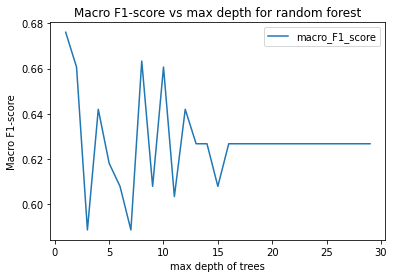

In [14]:
    plt.plot(rf_depths,macro_F1_score, label='macro_F1_score')
    plt.title('Macro F1-score vs max depth for random forest')
    plt.xlabel('max depth of trees')
    plt.ylabel('Macro F1-score')
    plt.legend()
    plt.show()

In [15]:
criterions = ['gini', 'entropy', 'log_loss']
macro_F1_score = []
for criterion in criterions:
    rfClassifier = RandomForestClassifier(criterion=criterion, max_depth=20,random_state=0)
    macro_F1_score.append(predict(rfClassifier, x_set2_train,  y_set2_train, x_set2_test, y_set2_test))

/tmp/ipykernel_106/156337231.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_set_train, y_set_train)
/tmp/ipykernel_106/156337231.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_set_train, y_set_train)


              precision    recall  f1-score   support

           0       0.50      0.68      0.58        22
           1       0.77      0.61      0.68        38

    accuracy                           0.63        60
   macro avg       0.63      0.64      0.63        60
weighted avg       0.67      0.63      0.64        60

              precision    recall  f1-score   support

           0       0.43      0.68      0.53        19
           1       0.80      0.59      0.68        41

    accuracy                           0.62        60
   macro avg       0.62      0.63      0.60        60
weighted avg       0.68      0.62      0.63        60

              precision    recall  f1-score   support

           0       0.43      0.68      0.53        19
           1       0.80      0.59      0.68        41

    accuracy                           0.62        60
   macro avg       0.62      0.63      0.60        60
weighted avg       0.68      0.62      0.63        60



/tmp/ipykernel_106/156337231.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_set_train, y_set_train)


In [16]:
test_x_set2 = pd.concat([set2, set_test[600:]])
new_x_set2 = preprocess(test_x_set2)
test_x_set2_train = new_x_set2[:200]
test_x_set2_test = new_x_set2[200:]
classifier = RandomForestClassifier(criterion='gini', max_depth=10)
classifier.fit(test_x_set2_train, y_set2)
y_pred2 = classifier.predict(test_x_set2_test)

/tmp/ipykernel_106/864556814.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(test_x_set2_train, y_set2)


In [17]:
y_pred2

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,

In [18]:
count = 0
for i in y_pred2:
    if i == 0:
        count+=1
count

175

In [19]:
df = pd.DataFrame(y_pred2, columns = ['Predicted'])

In [21]:
df.to_csv('last 400 out.csv')